In [2]:
import torch
import torchvision
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import pandas as pd
from load_data import MyData  # self-made
from torchvision import transforms
from tqdm import tqdm_notebook as tqdm # View procedure
import os
import scipy.io
from random import random
import numpy as np
import gc
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from net_cnn_lstm1 import MyNetwork

# self-made functions

In [3]:
def make_dataset(dataset,mode):
    # find the fold file
    count = 0
    for person in range(len(dataset)):
        filename = os.path.join(dataset.path, dataset.file_path[person])
        # extract the pure name of the file
        parts = filename.split("\\")
        file_name = parts[-1]
        name_without_extension = file_name.split(".")[0]
        # label or data
        file_last = name_without_extension.split("_")[-1]
        if file_last.isdigit(): # data
            # is this fold or not
            if int(file_last) == fold: # yes
                print(filename)
                count = count + 1
                data_map = torch.load(filename)
                # train or test
                if name_without_extension.split("_")[-2] == "train":
                    for i in range(data_map.size(0)):
                        train_data.append(data_map[i])
                elif name_without_extension.split("_")[-2] == "test":
                    for i in range(data_map.size(0)):
                        test_data.append(data_map[i])
                if count == 4:
                    del data_map
                    gc.collect()
                    torch.cuda.empty_cache()
                    break
            else:   # not
                pass
        else: # label
            file_last = name_without_extension.split("_")[-4]
            file_mode = name_without_extension.split("_")[-2]
            if file_mode == mode.split("_")[-1]: # is this mode or not
                # is this fold or not
                if int(file_last) == fold: # yes
                    print(filename)
                    count = count + 1
                    data_map = torch.load(filename)
                    # train or test
                    if name_without_extension.split("_")[-5] == "train":
                        for i in range(data_map.size(0)):
                            train_label.append(data_map[i])
                    elif name_without_extension.split("_")[-5] == "test":
                        for i in range(data_map.size(0)):
                            test_label.append(data_map[i])
                    if count == 4:
                        del data_map
                        gc.collect()
                        torch.cuda.empty_cache()
                        break
                else:   # not
                    pass
            else:
                pass
        del filename, parts, file_name, name_without_extension, file_last
        gc.collect()
        torch.cuda.empty_cache()

In [4]:
# ================================================ random
BATCH_SIZE = 1
C,H,W = 1,1,2400
# learn_rate = 0.0005
learn_rate=0.001
# num_epochs=50
num_epochs = 60

In [42]:
device = torch.device("cuda:0")
gc.collect()
torch.cuda.empty_cache()
# model.eval()  # 设置为评估模式

# ————————————————————————————————————————check this for every run!!!!!!!!!!!!!!!!
# 设置训练参数
    # experimental dir: rest, conditionA, conditionB, conditionC
exper_dir = "rest"
    # root_dir = f"../data/eegmap_split/{exper_dir}"
root_dir = f"../data/eegmap_split/{exper_dir}"
    # classification = "hc_doc"/doc or "mcs_uws"/uws
# classification = "hc_doc"
classification = "mcs_uws"
# fold_num = 5
fold = 4
# ----------------------------------------------------------------------------------------
# 加载数据
test_data = []
test_label = []
if classification == "hc_doc":
    # ---- hc
    dataset = MyData(root_dir, "test", "hc") # hc
    make_dataset(dataset,classification)
    # ---- mcs
dataset = MyData(root_dir, "test", "mcs") # hc
make_dataset(dataset,classification)
    # ---- uws
dataset = MyData(root_dir, "test", "uws") # hc
make_dataset(dataset,classification)
print(torch.stack(test_data).size())
print(torch.stack(test_label).size())
del dataset
gc.collect()
torch.cuda.empty_cache()  
test_data = torch.stack(test_data)
test_label = torch.stack(test_label)
    # test dataset
test_td = TensorDataset(test_data, test_label)
# test_loader = DataLoader(test_td, batch_size = BATCH_SIZE, shuffle = True)
test_loader = DataLoader(test_td, batch_size = BATCH_SIZE, shuffle = False)
del test_data, test_label, test_td
gc.collect()
torch.cuda.empty_cache()

../data/eegmap_split/rest\test\mcs\rest_mcs_test_4.pt
../data/eegmap_split/rest\test\mcs\rest_mcs_test_4_mcs_uws_label.pt
../data/eegmap_split/rest\test\uws\rest_uws_test_4.pt
../data/eegmap_split/rest\test\uws\rest_uws_test_4_mcs_uws_label.pt
torch.Size([384, 2400, 10, 11])
torch.Size([384])


# Train and get the grad

## do this for every classification

In [6]:
flag_all = 0
count_0_all = 0
count_1_all = 0
count_0_wrong_all = 0
count_1_wrong_all = 0
count_true_all = 0
count_false_all = 0
print("yes")

yes


## do this for every fold

In [43]:
a = 0
print("yes")

yes


In [44]:
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(32)  # 固定随机种子
# 定义模型结构和超参数
input_size = 64  # 输入特征维度
hidden_size = 64  # 隐藏单元数量
num_layers = 2    # LSTM层数
output_size = 2   # 输出类别数量

# 实例化模型
model = MyNetwork(input_size, hidden_size, num_layers, output_size)

# 加载已训练好的模型参数
if classification == 'hc_doc':
    model_num = [15,13,23,16,19]
    model_path = f'../grad_cam/rest_1/hc_doc/Fold{fold}_Epoch{model_num[fold]}.pt' 
elif classification == 'mcs_uws':
    model_num = [36,27,33,32,23]
    model_path = f'../grad_cam/rest_1/mcs_uws/Fold{fold}_Epoch{model_num[fold]}.pt' 
print(model_path)
model.load_state_dict(torch.load(model_path))
model = model.to(device)
# 切换模型到训练模式
model.train()
# model.eval()

indices = [0]

count_0 = 0
count_1 = 0
count_0_wrong = 0
count_1_wrong = 0

for i, data in tqdm(enumerate(test_loader)):
# for data in tqdm(test_loader):
#     if i <= 200:
    # testing code here
    data_map, label=data
    data_map_reshaped = torch.reshape(data_map, (110, 1, 1, 2400))
    # data_map_reshaped = torch.reshape(data_map, (59, 1, 1, 2400))
    label_int = label.long()
    data_map_reshaped = data_map_reshaped.to(device)
    label_int = label_int.to(device)
    del data_map, label
    gc.collect()
    torch.cuda.empty_cache()
    # y_pred
    label_pred_test = model(data_map_reshaped)
    predicted_class = label_pred_test.argmax(1)
    # ======================================================= grad-cam
    class_idx = predicted_class.item()
    class_score = label_pred_test[0, class_idx]  # 选择目标类别的输出
    # 反向传播以计算梯度
    model.zero_grad()
    class_score.backward() 
    # 获取目标卷积层的梯度和特征图
    gradients = model.gradients  # 卷积层的梯度 [B, C, H, W]
    feature_maps = model.feature_maps  # 卷积层的输出特征图 [B, C, H, W]
    # 计算每个特征图通道的权重
    pooled_gradients = torch.mean(gradients, dim=[2, 3])  # [B, C]
    feature_maps *= pooled_gradients.unsqueeze(-1).unsqueeze(-1)  # [B, C, H, W] * [B, C, 1, 1]
#         # 计算 Grad-CAM：对所有通道求平均并应用 ReLU
    heatmap = torch.mean(feature_maps, dim=[0, 1]).squeeze()  # [H, W]
#     print(heatmap.shape)
#         heatmap = F.relu(heatmap)  # 负值归零
#         heatmap /= torch.max(heatmap)  # 归一化到[0, 1]

    if a == 0:
        avg_heatmap_0 = torch.zeros_like(heatmap)  # 初始化全零张量用于存储平均热力图
        avg_heatmap_1 = torch.zeros_like(heatmap)
        avg_heatmap_0_wrong = torch.zeros_like(heatmap) # label为0但识别错误
        avg_heatmap_1_wrong = torch.zeros_like(heatmap) # label为1但识别错误
        avg_heatmap_true = torch.zeros_like(heatmap)
        avg_heatmap_false = torch.zeros_like(heatmap)
        a += 1
        print("blank fold")
        
    if flag_all == 0:
        avg_heatmap_0_all = torch.zeros_like(heatmap)
        avg_heatmap_1_all = torch.zeros_like(heatmap)
        avg_heatmap_0_wrong_all = torch.zeros_like(heatmap)
        avg_heatmap_1_wrong_all = torch.zeros_like(heatmap)
        avg_heatmap_true_all = torch.zeros_like(heatmap)
        avg_heatmap_false_all = torch.zeros_like(heatmap)
        flag_all += 1
        print("blank all")
    # separated labels
    if label_int.item() == 0 and predicted_class == 0:
        avg_heatmap_0 += heatmap
        count_0 += 1
    elif label_int.item() == 1 and predicted_class == 1:
        avg_heatmap_1 += heatmap
        count_1 += 1
    elif label_int.item() == 0 and predicted_class == 1:
        avg_heatmap_0_wrong += heatmap
        count_0_wrong += 1
    elif label_int.item() == 1 and predicted_class == 0:
        avg_heatmap_1_wrong += heatmap
        count_1_wrong += 1

    # =================================================================
    # Clear gpu
    del data_map_reshaped, label_int, data, label_pred_test, predicted_class, class_idx, class_score, gradients, feature_maps
    del pooled_gradients, heatmap
    gc.collect()
    torch.cuda.empty_cache()

../grad_cam/rest_1/mcs_uws/Fold4_Epoch23.pt


D:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:35: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

blank fold


# For every fold (separated labels)

In [45]:
print(count_0)
print(count_1)
print(f"true guess: {count_0 + count_1}")
print(count_0_wrong)
print(count_1_wrong)
print(f"false guess: {count_0_wrong + count_1_wrong}")

205
164
true guess: 369
5
10
false guess: 15


In [46]:
coordinates = [
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5, 5, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
     8, 8, 8],
    [0, 1, 2, 3, 7, 8, 9, 10, 0, 1, 2, 5, 8, 9, 10, 0, 10, 5, 0, 10, 0, 10, 0, 10, 0, 1, 2, 5, 8, 9, 10, 0, 1, 2, 3, 5,
     7, 8, 9, 10]
]
def gradcam_map(heatmap, count):
    heatmap /= count # 求平均
    heatmap = F.relu(heatmap) # 负值归零
    heatmap = heatmap.reshape(10,11)
    for i in range(40):
        heatmap[coordinates[0][i], coordinates[1][i]]=0
    heatmap /= torch.max(heatmap)  # 归一化到[0, 1]
    heatmap = heatmap.cpu().detach().numpy()
    heatmap = np.resize(heatmap, (10, 11))
    heatmap = heatmap[:9, :11]# 只选择前9行和前11列
    return heatmap
    
# ===========================================For separated labels
# for all folds
# avg_heatmap_0_all += avg_heatmap_0
# avg_heatmap_1_all += avg_heatmap_1
# avg_heatmap_0_wrong_all += avg_heatmap_0_wrong
# avg_heatmap_1_wrong_all += avg_heatmap_1_wrong
# count_0_all += count_0
# count_1_all += count_1
# count_0_wrong_all += count_0_wrong
# count_1_wrong_all += count_1_wrong
# for every fold
# avg_heatmap_0 = gradcam_map(avg_heatmap_0, count_0)
# avg_heatmap_1 = gradcam_map(avg_heatmap_1, count_1)
# avg_heatmap_0_wrong = gradcam_map(avg_heatmap_0_wrong, count_0_wrong)
# avg_heatmap_1_wrong = gradcam_map(avg_heatmap_1_wrong, count_1_wrong)
# ===========================================For unseparated labels
# for all folds
# true guess
avg_heatmap_true = count_0 * avg_heatmap_0 + count_1 * avg_heatmap_1
avg_heatmap_true_all += avg_heatmap_true
count_true_all += (count_0 + count_1)
avg_heatmap_true = gradcam_map(avg_heatmap_true, count_0 + count_1)
# false guess
avg_heatmap_false = count_0_wrong * avg_heatmap_0_wrong + count_1_wrong * avg_heatmap_1_wrong
avg_heatmap_false_all += avg_heatmap_false
count_false_all += (count_0_wrong + count_1_wrong)
avg_heatmap_false = gradcam_map(avg_heatmap_false, count_0_wrong + count_1_wrong)

## draw every fold

### For separated labels

In [47]:
# For separated labels
# if classification == 'hc_doc':
#     # 显示热力图
#     plt.imshow(avg_heatmap_0, cmap='YlOrRd', alpha=0.6)  # 使用颜色映射
#     plt.colorbar()  # 添加颜色条
#     plt.title(f"label: HC, pred: HC, fold{fold}")
#     plt.show()

#     plt.imshow(avg_heatmap_1, cmap='YlOrRd', alpha=0.6)  # 使用颜色映射
#     plt.colorbar()  # 添加颜色条
#     plt.title(f"label: DOC, pred: DOC, fold{fold}")
#     plt.show()

#     plt.imshow(avg_heatmap_0_wrong, cmap='YlOrRd', alpha=0.6)  # 使用颜色映射
#     plt.colorbar()  # 添加颜色条
#     plt.title(f"label: HC, pred: DOC, fold{fold}")
#     plt.show()

#     plt.imshow(avg_heatmap_1_wrong, cmap='YlOrRd', alpha=0.6)  # 使用颜色映射
#     plt.colorbar()  # 添加颜色条
#     plt.title(f"label: DOC, pred: HC, fold{fold}")
#     plt.show()
# elif classification == 'mcs_uws':
#     # 显示热力图
#     plt.imshow(avg_heatmap_0, cmap='YlOrRd', alpha=0.6)  # 使用颜色映射
#     plt.colorbar()  # 添加颜色条
#     plt.title(f"label: MCS, pred: MCS, fold{fold}")
#     plt.show()

#     plt.imshow(avg_heatmap_1, cmap='YlOrRd', alpha=0.6)  # 使用颜色映射
#     plt.colorbar()  # 添加颜色条
#     plt.title(f"label: UWS, pred: UWS, fold{fold}")
#     plt.show()

#     plt.imshow(avg_heatmap_0_wrong, cmap='YlOrRd', alpha=0.6)  # 使用颜色映射
#     plt.colorbar()  # 添加颜色条
#     plt.title(f"label: MCS, pred: UWS, fold{fold}")
#     plt.show()

#     plt.imshow(avg_heatmap_1_wrong, cmap='YlOrRd', alpha=0.6)  # 使用颜色映射
#     plt.colorbar()  # 添加颜色条
#     plt.title(f"label: UWS, pred: MCS, fold{fold}")
#     plt.show()

# print("\n===========================================\n")
# print(avg_heatmap_0)
# print("\n===========================================\n")
# print(avg_heatmap_1)
# print("\n===========================================\n")
# print(avg_heatmap_0_wrong)
# print("\n===========================================\n")
# print(avg_heatmap_1_wrong)

In [48]:
# from openpyxl import load_workbook

# # 将每个 numpy array 转换为 DataFrame
# df_heatmap_0 = pd.DataFrame(avg_heatmap_0)
# df_heatmap_1 = pd.DataFrame(avg_heatmap_1)
# df_heatmap_0_wrong = pd.DataFrame(avg_heatmap_0_wrong)
# df_heatmap_1_wrong = pd.DataFrame(avg_heatmap_1_wrong)

# if classification == 'hc_doc':
#     file_name = 'heatmaps_hc_doc.xlsx'
    
#     # 读取现有的 Excel 文件
#     try:
#         book = load_workbook(file_name)
#         writer = pd.ExcelWriter(file_name, engine='openpyxl')
#         writer.book = book
#     except FileNotFoundError:
#         writer = pd.ExcelWriter(file_name, engine='openpyxl')
        
#     # 每个数组保存为单独的工作表
#     df_heatmap_0.to_excel(writer, sheet_name=f'HC_HC_{fold}', index=False)
#     df_heatmap_1.to_excel(writer, sheet_name=f'DOC_DOC_{fold}', index=False)
#     df_heatmap_0_wrong.to_excel(writer, sheet_name=f'HC_DOC_{fold}', index=False)
#     df_heatmap_1_wrong.to_excel(writer, sheet_name=f'DOC_HC_{fold}', index=False)
    
#     writer.save()
#     print(f"HC/DOC 保存{fold}成功！")

# elif classification == 'mcs_uws':
#     file_name = 'heatmaps_mcs_uws.xlsx'
    
#     # 读取现有的 Excel 文件
#     try:
#         book = load_workbook(file_name)
#         writer = pd.ExcelWriter(file_name, engine='openpyxl')
#         writer.book = book
#     except FileNotFoundError:
#         writer = pd.ExcelWriter(file_name, engine='openpyxl')
    
#     # 每个数组保存为单独的工作表
#     df_heatmap_0.to_excel(writer, sheet_name=f'MCS_MCS_{fold}', index=False)
#     df_heatmap_1.to_excel(writer, sheet_name=f'UWS_UWS_{fold}', index=False)
#     df_heatmap_0_wrong.to_excel(writer, sheet_name=f'MCS_UWS_{fold}', index=False)
#     df_heatmap_1_wrong.to_excel(writer, sheet_name=f'UWS_MCS_{fold}', index=False)
        
#     writer.save()
#     print(f"MCS/UWS 保存{fold}成功！")

### For unseparated labels

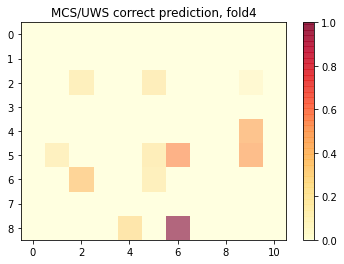

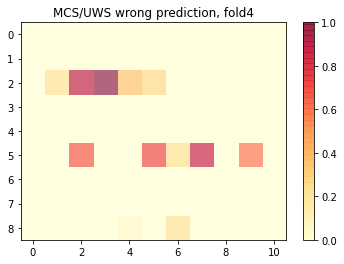



[[0.         0.         0.         0.         0.         0.00220201
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.17129186 0.         0.         0.1791169
  0.         0.         0.         0.06656526 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.44244197 0.        ]
 [0.         0.15511872 0.         0.         0.         0.18708397
  0.5260726  0.         0.         0.47677892 0.        ]
 [0.         0.         0.35074562 0.         0.         0.16742453
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.        

In [49]:
# For unseparated heatmap
# 显示热力图
plt.imshow(avg_heatmap_true, cmap='YlOrRd', alpha=0.6)  # 使用颜色映射
plt.colorbar()  # 添加颜色条
if classification == 'hc_doc':
    plt.title(f"HC/DOC correct prediction, fold{fold}")
elif classification == 'mcs_uws':
    plt.title(f"MCS/UWS correct prediction, fold{fold}")
plt.show()

plt.imshow(avg_heatmap_false, cmap='YlOrRd', alpha=0.6)  # 使用颜色映射
plt.colorbar()  # 添加颜色条
if classification == 'hc_doc':
    plt.title(f"HC/DOC wrong prediction, fold{fold}")
elif classification == 'mcs_uws':
    plt.title(f"MCS/UWS wrong prediction, fold{fold}")
plt.show()

print("\n===========================================\n")
print(avg_heatmap_true)
print("\n===========================================\n")
print(avg_heatmap_false)
print("\n===========================================\n")

In [50]:
from openpyxl import load_workbook

# 将每个 numpy array 转换为 DataFrame
df_heatmap_true = pd.DataFrame(avg_heatmap_true)
df_heatmap_false = pd.DataFrame(avg_heatmap_false)
if classification == 'hc_doc':
    file_name = 'heatmaps_hc_doc_unseparated.xlsx'
    
    # 读取现有的 Excel 文件
    try:
        book = load_workbook(file_name)
        writer = pd.ExcelWriter(file_name, engine='openpyxl')
        writer.book = book
    except FileNotFoundError:
        writer = pd.ExcelWriter(file_name, engine='openpyxl')
        
    # 每个数组保存为单独的工作表
    df_heatmap_true.to_excel(writer, sheet_name=f'correct_{fold}', index=False)
    df_heatmap_false.to_excel(writer, sheet_name=f'false_{fold}', index=False)

    writer.save()
    print(f"HC/DOC 保存{fold}成功！")

elif classification == 'mcs_uws':
    file_name = 'heatmaps_mcs_uws_unseparated.xlsx'
    
    # 读取现有的 Excel 文件
    try:
        book = load_workbook(file_name)
        writer = pd.ExcelWriter(file_name, engine='openpyxl')
        writer.book = book
    except FileNotFoundError:
        writer = pd.ExcelWriter(file_name, engine='openpyxl')
    
    # 每个数组保存为单独的工作表
    df_heatmap_true.to_excel(writer, sheet_name=f'correct_{fold}', index=False)
    df_heatmap_false.to_excel(writer, sheet_name=f'false_{fold}', index=False)
        
    writer.save()
    print(f"MCS/UWS 保存{fold}成功！")

MCS/UWS 保存4成功！


# For all fold

## generate gradcam map

In [51]:
print(count_true_all)
print(count_false_all)
print(avg_heatmap_true_all)
print(avg_heatmap_true_all)

1867
53
tensor([[-2.4353e-02,  1.4010e-02, -1.9756e-02, -2.2077e-02,  9.5002e-03,
          3.0417e-03, -3.7198e-02, -1.8207e-02, -3.4562e-02, -4.0329e-02,
         -4.0167e-02],
        [-1.4977e-02, -5.1408e-02, -1.4433e-02, -1.7265e-02, -2.7185e-02,
         -4.2923e-02, -7.4331e-03, -2.4583e-02, -6.7679e-02, -2.3899e-02,
         -3.0837e-02],
        [-2.3006e-03, -1.8654e-02,  1.3977e-02, -1.5491e-02, -1.4019e-02,
          8.0989e-03, -2.6308e-03, -3.6828e-02, -2.5472e-02,  8.7789e-03,
         -5.7169e-03],
        [-1.9902e-02, -2.7281e-02,  4.1540e-03, -2.7490e-02,  7.0620e-05,
         -1.6761e-02, -2.9206e-02, -1.7498e-02, -1.6710e-02, -1.2541e-02,
         -5.8754e-02],
        [-5.3258e-02, -5.9213e-02,  1.2506e-02, -2.1853e-02, -1.8509e-02,
         -2.4422e-02, -4.5943e-02, -4.5557e-02, -2.5759e-02, -1.3296e-02,
         -9.0647e-03],
        [-4.1627e-02, -3.6784e-03, -5.1486e-02, -1.3172e-02, -5.3333e-02,
         -1.9758e-02, -2.5711e-02,  2.7637e-03, -3.8614e-02, -2

In [52]:
coordinates = [
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5, 5, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
     8, 8, 8],
    [0, 1, 2, 3, 7, 8, 9, 10, 0, 1, 2, 5, 8, 9, 10, 0, 10, 5, 0, 10, 0, 10, 0, 10, 0, 1, 2, 5, 8, 9, 10, 0, 1, 2, 3, 5,
     7, 8, 9, 10]
]
def gradcam_map(heatmap, count):
    heatmap /= count # 求平均
    heatmap = F.relu(heatmap) # 负值归零
    heatmap = heatmap.reshape(10,11)
    for i in range(40):
        heatmap[coordinates[0][i], coordinates[1][i]]=0
    heatmap /= torch.max(heatmap)  # 归一化到[0, 1]
    heatmap = heatmap.cpu().detach().numpy()
    heatmap = np.resize(heatmap, (10, 11))
    heatmap = heatmap[:9, :11]# 只选择前9行和前11列
    return heatmap

# For separated labels
# avg_heatmap_0_all = gradcam_map(avg_heatmap_0_all, count_0_all)
# avg_heatmap_1_all = gradcam_map(avg_heatmap_1_all, count_1_all)
# avg_heatmap_0_wrong_all = gradcam_map(avg_heatmap_0_wrong_all, count_0_wrong_all)
# avg_heatmap_1_wrong_all = gradcam_map(avg_heatmap_1_wrong_all, count_1_wrong_all)

# For unseparated labels
# true guess
avg_heatmap_true_all = gradcam_map(avg_heatmap_true_all, count_true_all)
# false guess
avg_heatmap_false_all = gradcam_map(avg_heatmap_false_all, count_false_all)

## draw all fold

### For separated labels

In [53]:
# if classification == 'hc_doc':
#     plt.imshow(avg_heatmap_0_all, cmap='YlOrRd', alpha=0.6)  # 使用颜色映射
#     plt.colorbar()  # 添加颜色条
#     plt.title(f"label: HC, pred: HC")
#     plt.show()

#     plt.imshow(avg_heatmap_1_all, cmap='YlOrRd', alpha=0.6)  # 使用颜色映射
#     plt.colorbar()  # 添加颜色条
#     plt.title(f"label: DOC, pred: DOC")
#     plt.show()

#     plt.imshow(avg_heatmap_0_wrong_all, cmap='YlOrRd', alpha=0.6)  # 使用颜色映射
#     plt.colorbar()  # 添加颜色条
#     plt.title(f"label: HC, pred: DOC")
#     plt.show()

#     plt.imshow(avg_heatmap_1_wrong_all, cmap='YlOrRd', alpha=0.6)  # 使用颜色映射
#     plt.colorbar()  # 添加颜色条
#     plt.title(f"label: DOC, pred: HC")
#     plt.show()
    
# elif classification == 'mcs_uws':
#     # 显示热力图
#     plt.imshow(avg_heatmap_0_all, cmap='YlOrRd', alpha=0.6)  # 使用颜色映射
#     plt.colorbar()  # 添加颜色条
#     plt.title(f"label: MCS, pred: MCS")
#     plt.show()

#     plt.imshow(avg_heatmap_1_all, cmap='YlOrRd', alpha=0.6)  # 使用颜色映射
#     plt.colorbar()  # 添加颜色条
#     plt.title(f"label: UWS, pred: UWS")
#     plt.show()

#     plt.imshow(avg_heatmap_0_wrong_all, cmap='YlOrRd', alpha=0.6)  # 使用颜色映射
#     plt.colorbar()  # 添加颜色条
#     plt.title(f"label: MCS, pred: UWS")
#     plt.show()

#     plt.imshow(avg_heatmap_1_wrong_all, cmap='YlOrRd', alpha=0.6)  # 使用颜色映射
#     plt.colorbar()  # 添加颜色条
#     plt.title(f"label: UWS, pred: MCS")
#     plt.show()

# print("\n===========================================\n")
# print(avg_heatmap_0_all)
# print("\n===========================================\n")
# print(avg_heatmap_1_all)
# print("\n===========================================\n")
# print(avg_heatmap_0_wrong_all)
# print("\n===========================================\n")
# print(avg_heatmap_1_wrong_all)

In [54]:
# # 将每个 numpy array 转换为 DataFrame
# df_heatmap_0_all = pd.DataFrame(avg_heatmap_0_all)
# df_heatmap_1_all = pd.DataFrame(avg_heatmap_1_all)
# df_heatmap_0_wrong_all = pd.DataFrame(avg_heatmap_0_wrong_all)
# df_heatmap_1_wrong_all = pd.DataFrame(avg_heatmap_1_wrong_all)


# if classification == 'hc_doc':
#     file_name = 'heatmaps_hc_doc.xlsx'
    
#     # 读取现有的 Excel 文件
#     try:
#         book = load_workbook(file_name)
#         writer = pd.ExcelWriter(file_name, engine='openpyxl')
#         writer.book = book
#     except FileNotFoundError:
#         writer = pd.ExcelWriter(file_name, engine='openpyxl')
        
#     # 每个数组保存为单独的工作表
#     df_heatmap_0_all.to_excel(writer, sheet_name=f'HC_HC_all', index=False)
#     df_heatmap_1_all.to_excel(writer, sheet_name=f'DOC_DOC_all', index=False)
#     df_heatmap_0_wrong_all.to_excel(writer, sheet_name=f'HC_DOC_all', index=False)
#     df_heatmap_1_wrong_all.to_excel(writer, sheet_name=f'DOC_HC_all', index=False)
    
#     writer.save()
#     print("保存成功！")

# elif classification == 'mcs_uws':
#     file_name = 'heatmaps_mcs_uws.xlsx'
    
#     # 读取现有的 Excel 文件
#     try:
#         book = load_workbook(file_name)
#         writer = pd.ExcelWriter(file_name, engine='openpyxl')
#         writer.book = book
#     except FileNotFoundError:
#         writer = pd.ExcelWriter(file_name, engine='openpyxl')
    
#     # 每个数组保存为单独的工作表
#     df_heatmap_0_all.to_excel(writer, sheet_name=f'MCS_MCS_all', index=False)
#     df_heatmap_1_all.to_excel(writer, sheet_name=f'UWS_UWS_all', index=False)
#     df_heatmap_0_wrong_all.to_excel(writer, sheet_name=f'MCS_UWS_all', index=False)
#     df_heatmap_1_wrong_all.to_excel(writer, sheet_name=f'UWS_MCS_all', index=False)
        
#     writer.save()
#     print("保存成功2！")

### For unseparated labels

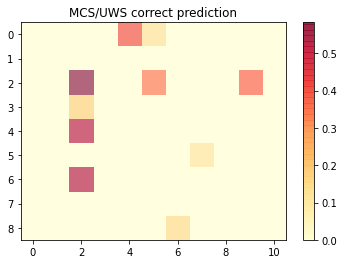

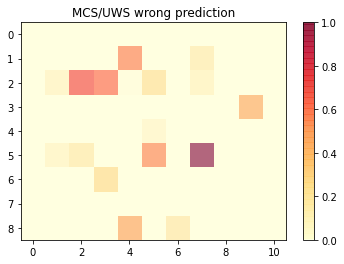



[[0.         0.         0.         0.         0.3962695  0.12687477
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.5830242  0.         0.         0.3378203
  0.         0.         0.         0.3661821  0.        ]
 [0.         0.         0.17327246 0.         0.00294569 0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.5216666  0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.11527805 0.         0.         0.        ]
 [0.         0.         0.530543   0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.  

In [55]:
# For unseparated heatmap
# 显示热力图
plt.imshow(avg_heatmap_true_all, cmap='YlOrRd', alpha=0.6)  # 使用颜色映射
plt.colorbar()  # 添加颜色条
if classification == 'hc_doc':
    plt.title(f"HC/DOC correct prediction")
elif classification == 'mcs_uws':
    plt.title(f"MCS/UWS correct prediction")
plt.show()

plt.imshow(avg_heatmap_false_all, cmap='YlOrRd', alpha=0.6)  # 使用颜色映射
plt.colorbar()  # 添加颜色条
if classification == 'hc_doc':
    plt.title(f"HC/DOC wrong prediction")
elif classification == 'mcs_uws':
    plt.title(f"MCS/UWS wrong prediction")
plt.show()

print("\n===========================================\n")
print(avg_heatmap_true_all)
print("\n===========================================\n")
print(avg_heatmap_false_all)
print("\n===========================================\n")

In [56]:
from openpyxl import load_workbook

# 将每个 numpy array 转换为 DataFrame
df_heatmap_true_all = pd.DataFrame(avg_heatmap_true_all)
df_heatmap_false_all = pd.DataFrame(avg_heatmap_false_all)
if classification == 'hc_doc':
    file_name = 'heatmaps_hc_doc_unseparated.xlsx'
    
    # 读取现有的 Excel 文件
    try:
        book = load_workbook(file_name)
        writer = pd.ExcelWriter(file_name, engine='openpyxl')
        writer.book = book
    except FileNotFoundError:
        writer = pd.ExcelWriter(file_name, engine='openpyxl')
        
    # 每个数组保存为单独的工作表
    df_heatmap_true_all.to_excel(writer, sheet_name=f'correct_all', index=False)
    df_heatmap_false_all.to_excel(writer, sheet_name=f'false_all', index=False)

    writer.save()
    print(f"HC/DOC 保存成功！")

elif classification == 'mcs_uws':
    file_name = 'heatmaps_mcs_uws_unseparated.xlsx'
    
    # 读取现有的 Excel 文件
    try:
        book = load_workbook(file_name)
        writer = pd.ExcelWriter(file_name, engine='openpyxl')
        writer.book = book
    except FileNotFoundError:
        writer = pd.ExcelWriter(file_name, engine='openpyxl')
    
    # 每个数组保存为单独的工作表
    df_heatmap_true_all.to_excel(writer, sheet_name=f'correct_all', index=False)
    df_heatmap_false_all.to_excel(writer, sheet_name=f'false_all', index=False)
        
    writer.save()
    print(f"MCS/UWS 保存成功！")

MCS/UWS 保存成功！
